## Explore TF isoform expression data

TODO
1. Calculate gene-level and isoform-level tissue-specificity scores

In [65]:
import os
from itertools import combinations

import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd


import ccsblib
from ccsblib import ccsbplotlib as cplt

from data_loading import (load_isoform_and_paralog_y2h_data,
                          load_y1h_pdi_data,
                          load_m1h_activation_data,
                          load_valid_isoform_clones,
                          load_rna_expression_data,
                          load_seq_comparison_data)

%matplotlib inline

In [66]:
# calculate tissue-specificity score for each isoform
def calculate_tiss_spec(x):
    # assumes input of a row of only the tissue expression data
    med = x.median() 
    iqr = x.quantile(0.75) - x.quantile(0.25)
    for tiss in x.index:
        score = (x[tiss] - med) / float(iqr)
        x[tiss] = score
    x['max_tip'] = x.max()
    return x

In [67]:
# Calculate tissue-specificity score for Lambert TFs in GTEx
# Both at isoform and gene level
fn = '/Users/gloriasheynkman/Documents/research_drive/files_ccsb/project_tf_isoforms/iso_master/analysis2/17_tiss_expression/a_lambert_tfs_gtex_iso_medians.tsv'
# load gtex data, median for each isoform
gt = pd.read_table(fn)

In [68]:
# gene-level data
gtg = gt.drop(columns=['isoname', 'appris_rank'])
gtg = gtg.groupby('gene').sum()
# gtex gene-level scores
gtgs = gtg.apply(calculate_tiss_spec, axis=1)
gtgs.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


,adipose,adrenal_gland,artery,bladder,brain,breast,cells,cervix,colon,esophagus,...,skin,small_intestine,spleen,stomach,testis,thyroid,uterus,vagina,whole_blood,max_tip
gene,,,,,,,,,,,,,,,,,,,,,
AC023509.3,0.656770,0.028875,1.584656,0.197346,-0.683648,0.307462,5.266614,-0.174727,0.000000,0.570192,...,-0.332915,-0.490098,-1.308971,-0.678265,-0.757402,-0.298023,0.729773,0.201063,-1.390636,5.266614
AC092835.1,0.000000,0.000000,0.000000,2.169659,0.000000,0.000000,1.793892,2.380971,0.888812,1.205127,...,0.000000,0.000000,0.000000,0.000000,2.598186,0.999685,2.143781,0.459106,0.000000,2.598186
ADNP,-0.832970,0.323038,0.491102,-0.020149,0.107396,-0.629756,-2.255214,0.284810,0.534387,0.361090,...,0.000000,0.449866,2.090081,0.252264,2.818305,-0.239327,0.498836,-0.252542,-1.573869,2.818305
ADNP2,0.508389,-0.534602,-0.157302,0.943831,-1.532543,0.645315,0.566064,-0.196187,-0.183818,0.173201,...,2.090451,0.000000,-0.455906,-0.350386,4.978282,0.188759,-0.394874,0.146169,-2.674572,4.978282
AEBP1,0.873514,-0.196716,6.940975,0.662797,-0.510048,0.746549,-0.251459,2.132590,0.109833,0.000000,...,0.019151,-0.064640,-0.148331,-0.280085,-0.177429,0.100873,1.700510,1.374710,-0.587561,6.940975


In [69]:
# isoform-level data
gti = gt.set_index(['gene', 'isoname', 'appris_rank'])
# gtex isoform-level scores
gtis = gti.apply(calculate_tiss_spec, axis=1)
gtis.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


adipose  adrenal_gland    artery  \
gene   isoname        appris_rank                                      
SP7    AC073611.1-202 1            1.915216       0.000000  0.000000   
ZUFSP  ZUP1-202       1            0.285508       0.114344 -0.562428   
       ZUP1-201       2                 NaN            NaN       NaN   
PHF19  PHF19-202      1           -0.112808      -0.291029  0.914290   
       PHF19-201      2           -0.468616       0.938025  0.498372   

                                    bladder     brain    breast      cells  \
gene   isoname        appris_rank                                            
SP7    AC073611.1-202 1            0.000000  4.517383  0.978227   0.000000   
ZUFSP  ZUP1-202       1            0.455426 -0.198986  0.478650   2.564432   
       ZUP1-201       2                 inf       NaN       NaN        inf   
PHF19  PHF19-202      1            0.689598 -0.249339 -0.148503   0.123859   
       PHF19-201      2           -0.499672 -0.365121 -0.497045  11.869096   

                                     cervix     colon  esophagus  ...  \
gene   isoname        appris_rank                                 ...   
SP7    AC073611.1-202 1            0.973963  0.000000   0.000000  ...   
ZUFSP  ZUP1-202       1            0.049299 -0.092795   0.099225  ...   
       ZUP1-201       2                 NaN       NaN        NaN  ...   
PHF19  PHF19-202      1            0.703410  0.374452   0.755212  ...   
       PHF19-201      2            0.659615  0.130872   1.362221  ...   

                                       skin  small_intestine    spleen  \
gene   isoname        appris_rank                                        
SP7    AC073611.1-202 1            0.761601         0.000000  0.917448   
ZUFSP  ZUP1-202       1            0.797900         1.260650  0.855089   
       ZUP1-201       2                 inf              NaN       NaN   
PHF19  PHF19-202      1           -0.493432        -0.048197  0.257935   
       PHF19-201      2           -0.041287         0.424090  3.722620   

                                    stomach     testis   thyroid    uterus  \
gene   isoname        appris_rank                                            
SP7    AC073611.1-202 1            0.000000  35.817213  8.624944  1.021773   
ZUFSP  ZUP1-202       1           -0.372272   1.599733 -0.028661 -0.395180   
       ZUP1-201       2                 NaN        NaN       NaN       NaN   
PHF19  PHF19-202      1           -0.499716   0.000000 -0.370053  0.985676   
       PHF19-201      2           -0.078447  -0.939649 -0.486790  0.000000   

                                     vagina  whole_blood    max_tip  
gene   isoname        appris_rank                                    
SP7    AC073611.1-202 1            0.000000     0.000000  35.817213  
ZUFSP  ZUP1-202       1            0.420485    -2.575543   2.564432  
       ZUP1-201       2                 NaN          NaN        inf  
PHF19  PHF19-202      1            0.339760    -0.330783   0.985676  
       PHF19-201      2            0.504911     3.917348  11.869096  

[5 rows x 32 columns]

In [70]:
# combine gene and isoform-level data into a isoform-specific tissue-specificity score
# gtex isoform and gene scores
gtigs = pd.merge(gtis.reset_index(), gtgs.reset_index(), how='left', on='gene', suffixes=['_iso', '_gene']) 
gtigs = gtigs[['gene', 'isoname', 'appris_rank', 'max_tip_iso', 'max_tip_gene']]
gtigs['iso_spec_tip'] = gtigs['max_tip_iso'] / gtigs['max_tip_gene']
gtigs.head()

,gene,isoname,appris_rank,max_tip_iso,max_tip_gene,iso_spec_tip
0,SP7,AC073611.1-202,1,35.817213,35.817213,1.000000
1,ZUFSP,ZUP1-202,1,2.564432,2.598899,0.986738
2,ZUFSP,ZUP1-201,2,inf,2.598899,inf
3,PHF19,PHF19-202,1,0.985676,0.901533,1.093333
4,PHF19,PHF19-201,2,11.869096,0.901533,13.165455


In [ ]:
# distribution of iso and gene tip scores

Text(0, 0.5, 'TiP isoform score (max across GTEx tissues)')

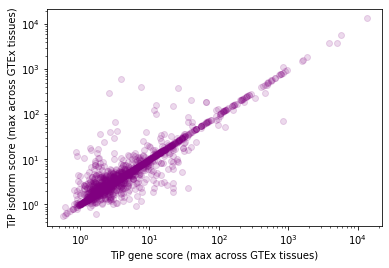

In [81]:
# compare gene-level and isoform-level tip scores
fig, ax = plt.subplots()
plt.scatter(gtigs['max_tip_gene'], gtigs['max_tip_iso'], alpha=0.15, color='purple')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('TiP gene score (max across GTEx tissues)')
plt.ylabel('TiP isoform score (max across GTEx tissues)')

Text(0, 0.5, 'Count')

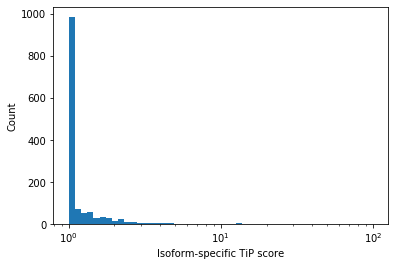

In [121]:
# what is the distribution of isoform-specific tip score
# remove nan and inf values
gtigs2 = gtigs.replace([np.inf, -np.inf], np.nan)
MIN = 1
MAX = 100
plt.hist(gtigs2['iso_spec_tip'], bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.xscale('log')
plt.xlabel('Isoform-specific TiP score')
plt.ylabel('Count')
# plt.ylim(0,100)

Text(0, 0.5, 'Count')

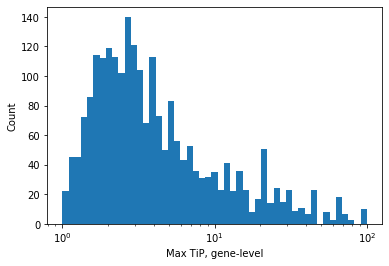

In [136]:
# distribution of gene-level tip scores
MIN = 1
MAX = 100
plt.hist(gtigs2['max_tip_gene'], bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.xscale('log')
plt.xlabel('Max TiP, gene-level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

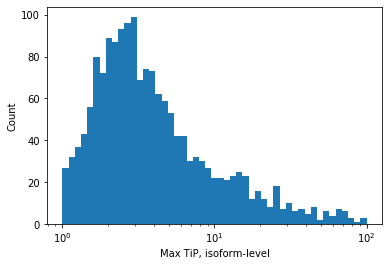

In [137]:
# distribution of iso-level tip scores
MIN = 1
MAX = 100
plt.hist(gtigs2['max_tip_iso'], bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.xscale('log')
plt.xlabel('Max TiP, isoform-level')
plt.ylabel('Count')

In [51]:
tfs, ptrs, = load_rna_expression_data()
tfs = tfs.drop(columns=['tpm_stdev'])

ValueError: too many values to unpack (expected 2)

In [ ]:
tfs = tfs.set_index(['gene', 'isoacc', 'tiss'])
tfs = tfs.unstack(level='tiss')
tfs.columns = tfs.columns.get_level_values(1)
tfs['median'] = tfs.median(axis=1)
tfs['iqr'] = tfs.quantile(0.75, axis=1) - tfs.quantile(0.25, axis=1)

In [ ]:
# calculate tissue-specificity score for each isoform
def calculate_tiss_spec(x):
    med = x['median']
    iqr = x['iqr']
    for tiss in x.index[:-2]:
        score = (x[tiss] - med) / float(iqr)
        x[tiss] = score
    return x
tfs.apply(calculate_tiss_spec, axis=1)

In [ ]:
tfs.to_csv('expr_data_tiss_scores.tsv', sep='\t')